In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454867, 30)
After OverSampling, the shape of train_y: (454867,) 

After OverSampling, counts of label '1': 227415
After OverSampling, counts of label '0': 227452
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

454867/454867 [==============================] - 27s 58us/step - loss: 12.4145 - rec_loss: 19.9096 - kl_loss: 3.9649 - val_loss: 13.3085 - val_rec_loss: 23.6161 - val_kl_loss: 2.5446
Epoch 17/150
454867/454867 [==============================] - 27s 59us/step - loss: 12.1561 - rec_loss: 19.4229 - kl_loss: 3.9565 - val_loss: 13.0961 - val_rec_loss: 23.1844 - val_kl_loss: 2.5584
Epoch 18/150
454867/454867 [==============================] - 27s 60us/step - loss: 12.2750 - rec_loss: 19.6315 - kl_loss: 3.9685 - val_loss: 13.2443 - val_rec_loss: 23.3621 - val_kl_loss: 2.6774
Epoch 19/150
454867/454867 [==============================] - 27s 59us/step - loss: 12.9985 - rec_loss: 20.9923 - kl_loss: 4.0260 - val_loss: 13.4452 - val_rec_loss: 23.7091 - val_kl_loss: 2.6722
Epoch 20/150
454867/454867 [==============================] - 27s 58us/step - loss: 12.7746 - rec_loss: 20.4470 - kl_loss: 4.0650 - val_loss: 13.2804 - val_rec_loss: 23.4753 - val_kl_loss: 2.5791
Epoch 21/150
454867/454867 [=====

454867/454867 [==============================] - 27s 59us/step - loss: 12.1620 - rec_loss: 18.9519 - kl_loss: 4.2877 - val_loss: 12.8749 - val_rec_loss: 22.1065 - val_kl_loss: 2.9587
Epoch 58/150
454867/454867 [==============================] - 27s 59us/step - loss: 12.3256 - rec_loss: 19.3706 - kl_loss: 4.2449 - val_loss: 13.3653 - val_rec_loss: 23.0973 - val_kl_loss: 2.9712
Epoch 59/150
454867/454867 [==============================] - 27s 59us/step - loss: 12.3408 - rec_loss: 19.3320 - kl_loss: 4.2739 - val_loss: 13.2753 - val_rec_loss: 22.6270 - val_kl_loss: 3.2136
Epoch 60/150
454867/454867 [==============================] - 27s 58us/step - loss: 12.3064 - rec_loss: 19.2149 - kl_loss: 4.2773 - val_loss: 13.1201 - val_rec_loss: 22.5464 - val_kl_loss: 2.9573
Epoch 61/150
454867/454867 [==============================] - 27s 58us/step - loss: 12.0543 - rec_loss: 18.8285 - kl_loss: 4.2079 - val_loss: 13.0390 - val_rec_loss: 22.3995 - val_kl_loss: 3.0158
Epoch 62/150
454867/454867 [=====

Epoch 99/150
454867/454867 [==============================] - 26s 58us/step - loss: 12.4822 - rec_loss: 19.3513 - kl_loss: 4.4425 - val_loss: 13.4337 - val_rec_loss: 22.4846 - val_kl_loss: 3.6311
Epoch 100/150
454867/454867 [==============================] - 25s 56us/step - loss: 12.5721 - rec_loss: 19.5424 - kl_loss: 4.4435 - val_loss: 14.4626 - val_rec_loss: 24.6824 - val_kl_loss: 3.4696
Epoch 101/150
454867/454867 [==============================] - 24s 54us/step - loss: 12.5732 - rec_loss: 19.6180 - kl_loss: 4.4052 - val_loss: 15.3882 - val_rec_loss: 26.6213 - val_kl_loss: 3.4583
Epoch 102/150
454867/454867 [==============================] - 24s 54us/step - loss: 12.5936 - rec_loss: 19.7145 - kl_loss: 4.3847 - val_loss: 13.5880 - val_rec_loss: 23.0320 - val_kl_loss: 3.4563
Epoch 103/150
454867/454867 [==============================] - 24s 54us/step - loss: 12.4995 - rec_loss: 19.5443 - kl_loss: 4.3918 - val_loss: 15.8684 - val_rec_loss: 27.6383 - val_kl_loss: 3.4195
Epoch 104/150
45

454867/454867 [==============================] - 24s 54us/step - loss: 11.7684 - rec_loss: 18.2549 - kl_loss: 4.3362 - val_loss: 13.0096 - val_rec_loss: 22.1518 - val_kl_loss: 3.2905
Epoch 141/150
454867/454867 [==============================] - 24s 54us/step - loss: 11.7072 - rec_loss: 18.1194 - kl_loss: 4.3551 - val_loss: 13.1085 - val_rec_loss: 22.3472 - val_kl_loss: 3.2931
Epoch 142/150
454867/454867 [==============================] - 24s 54us/step - loss: 11.7335 - rec_loss: 18.1568 - kl_loss: 4.3636 - val_loss: 12.8235 - val_rec_loss: 21.6817 - val_kl_loss: 3.3731
Epoch 143/150
454867/454867 [==============================] - 25s 54us/step - loss: 11.7320 - rec_loss: 18.1452 - kl_loss: 4.3743 - val_loss: 13.3322 - val_rec_loss: 22.8099 - val_kl_loss: 3.2796
Epoch 144/150
454867/454867 [==============================] - 25s 54us/step - loss: 11.6797 - rec_loss: 18.0820 - kl_loss: 4.3423 - val_loss: 13.5872 - val_rec_loss: 23.1471 - val_kl_loss: 3.4416
Epoch 145/150
454867/454867 [

454867/454867 [==============================] - 83s 182us/step - loss: 0.3459 - accuracy: 0.8554 - val_loss: 0.3035 - val_accuracy: 0.8631
Epoch 41/50
454867/454867 [==============================] - 82s 181us/step - loss: 0.3455 - accuracy: 0.8554 - val_loss: 0.2839 - val_accuracy: 0.8740
Epoch 42/50
454867/454867 [==============================] - 83s 182us/step - loss: 0.3460 - accuracy: 0.8552 - val_loss: 0.2970 - val_accuracy: 0.8701
Epoch 43/50
454867/454867 [==============================] - 83s 182us/step - loss: 0.3457 - accuracy: 0.8557 - val_loss: 0.2961 - val_accuracy: 0.8639
Epoch 44/50
454867/454867 [==============================] - 83s 182us/step - loss: 0.3454 - accuracy: 0.8556 - val_loss: 0.2946 - val_accuracy: 0.8683
Epoch 45/50
454867/454867 [==============================] - 83s 183us/step - loss: 0.3450 - accuracy: 0.8554 - val_loss: 0.2950 - val_accuracy: 0.8674
Epoch 46/50
454867/454867 [==============================] - 83s 182us/step - loss: 0.3450 - accurac

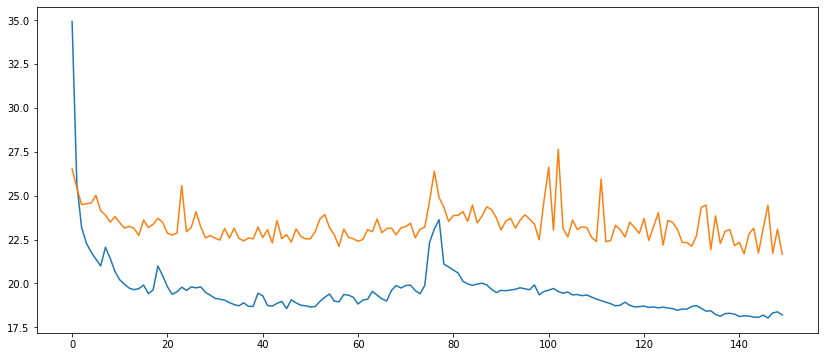

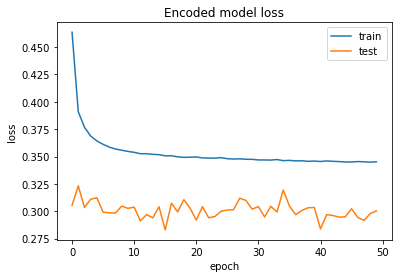

Overall accuracy of Convolutional Neural Network model: 0.8666303851690601


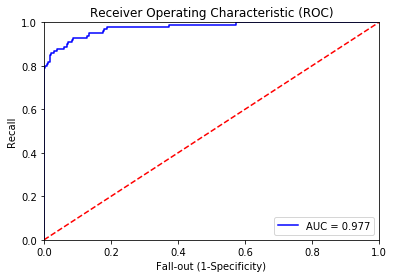

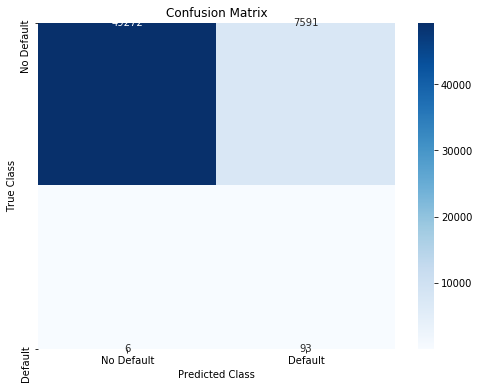

AUC(ROC): 0.9029488206369483
Precision: 0.012103071317022384
Recall: 0.9393939393939394
F1 score: 0.023898239753308494
False positives: 7591
True positives: 93
False negatives: 6
True negatives: 49272
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454850, 30)
After OverSampling, the shape of train_y: (454850,) 

After OverSampling, counts of label '1': 227398
After OverSampling, counts of label '0': 227452
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

454850/454850 [==============================] - 25s 54us/step - loss: 12.4207 - rec_loss: 19.8262 - kl_loss: 4.0374 - val_loss: 12.8028 - val_rec_loss: 22.3362 - val_kl_loss: 2.7655
Epoch 17/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.3464 - rec_loss: 19.6376 - kl_loss: 4.0604 - val_loss: 12.8420 - val_rec_loss: 22.3377 - val_kl_loss: 2.8149
Epoch 18/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.4275 - rec_loss: 19.7457 - kl_loss: 4.0933 - val_loss: 12.7520 - val_rec_loss: 22.1103 - val_kl_loss: 2.8504
Epoch 19/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.3524 - rec_loss: 19.5839 - kl_loss: 4.0965 - val_loss: 12.7975 - val_rec_loss: 22.1725 - val_kl_loss: 2.8774
Epoch 20/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.4190 - rec_loss: 19.7130 - kl_loss: 4.0983 - val_loss: 13.0915 - val_rec_loss: 22.8662 - val_kl_loss: 2.7340
Epoch 21/150
454850/454850 [=====

Epoch 58/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.0842 - rec_loss: 19.0314 - kl_loss: 4.1464 - val_loss: 12.8226 - val_rec_loss: 22.1164 - val_kl_loss: 2.9640
Epoch 59/150
454850/454850 [==============================] - 25s 54us/step - loss: 11.9781 - rec_loss: 18.8278 - kl_loss: 4.1634 - val_loss: 12.7427 - val_rec_loss: 21.9546 - val_kl_loss: 2.9607
Epoch 60/150
454850/454850 [==============================] - 25s 55us/step - loss: 11.9604 - rec_loss: 18.7743 - kl_loss: 4.1810 - val_loss: 12.6753 - val_rec_loss: 21.7924 - val_kl_loss: 3.0056
Epoch 61/150
454850/454850 [==============================] - 25s 55us/step - loss: 11.9596 - rec_loss: 18.7698 - kl_loss: 4.1869 - val_loss: 12.6402 - val_rec_loss: 21.8084 - val_kl_loss: 2.8975
Epoch 62/150
454850/454850 [==============================] - 25s 54us/step - loss: 13.0173 - rec_loss: 20.8024 - kl_loss: 4.2293 - val_loss: 12.7329 - val_rec_loss: 22.1228 - val_kl_loss: 2.7841
Epoch 63/150
454850/

454850/454850 [==============================] - 25s 55us/step - loss: 12.6459 - rec_loss: 19.9074 - kl_loss: 4.2794 - val_loss: 12.7631 - val_rec_loss: 21.7581 - val_kl_loss: 3.0734
Epoch 100/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.3040 - rec_loss: 19.2810 - kl_loss: 4.2764 - val_loss: 12.7006 - val_rec_loss: 21.7826 - val_kl_loss: 2.9659
Epoch 101/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.2008 - rec_loss: 19.1218 - kl_loss: 4.2568 - val_loss: 12.5619 - val_rec_loss: 21.5188 - val_kl_loss: 2.9866
Epoch 102/150
454850/454850 [==============================] - 25s 54us/step - loss: 13.3551 - rec_loss: 21.4003 - kl_loss: 4.3042 - val_loss: 12.9253 - val_rec_loss: 22.2709 - val_kl_loss: 2.8884
Epoch 103/150
454850/454850 [==============================] - 25s 54us/step - loss: 13.5698 - rec_loss: 21.7552 - kl_loss: 4.2834 - val_loss: 12.8103 - val_rec_loss: 21.9709 - val_kl_loss: 2.9243
Epoch 104/150
454850/454850 [

Epoch 141/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.4424 - rec_loss: 19.4832 - kl_loss: 4.3254 - val_loss: 12.9385 - val_rec_loss: 22.1233 - val_kl_loss: 3.0234
Epoch 142/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.5325 - rec_loss: 19.6332 - kl_loss: 4.3279 - val_loss: 12.9711 - val_rec_loss: 22.1976 - val_kl_loss: 3.0211
Epoch 143/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.3978 - rec_loss: 19.4034 - kl_loss: 4.3053 - val_loss: 13.1667 - val_rec_loss: 22.6165 - val_kl_loss: 2.9922
Epoch 144/150
454850/454850 [==============================] - 25s 54us/step - loss: 12.3759 - rec_loss: 19.3551 - kl_loss: 4.3143 - val_loss: 13.2662 - val_rec_loss: 22.6147 - val_kl_loss: 3.2099
Epoch 145/150
454850/454850 [==============================] - 25s 55us/step - loss: 12.4689 - rec_loss: 19.5278 - kl_loss: 4.3375 - val_loss: 13.1801 - val_rec_loss: 22.7185 - val_kl_loss: 2.9357
Epoch 146/150
4

454850/454850 [==============================] - 85s 188us/step - loss: 0.3431 - accuracy: 0.8491 - val_loss: 0.2777 - val_accuracy: 0.8512
Epoch 42/50
454850/454850 [==============================] - 87s 192us/step - loss: 0.3427 - accuracy: 0.8492 - val_loss: 0.2774 - val_accuracy: 0.8501
Epoch 43/50
454850/454850 [==============================] - 87s 191us/step - loss: 0.3432 - accuracy: 0.8494 - val_loss: 0.2730 - val_accuracy: 0.8523
Epoch 44/50
454850/454850 [==============================] - 88s 192us/step - loss: 0.3426 - accuracy: 0.8495 - val_loss: 0.2837 - val_accuracy: 0.8485
Epoch 45/50
454850/454850 [==============================] - 87s 192us/step - loss: 0.3422 - accuracy: 0.8493 - val_loss: 0.2892 - val_accuracy: 0.8458
Epoch 46/50
454850/454850 [==============================] - 87s 192us/step - loss: 0.3427 - accuracy: 0.8496 - val_loss: 0.2872 - val_accuracy: 0.8478
Epoch 47/50
454850/454850 [==============================] - 87s 191us/step - loss: 0.3429 - accurac

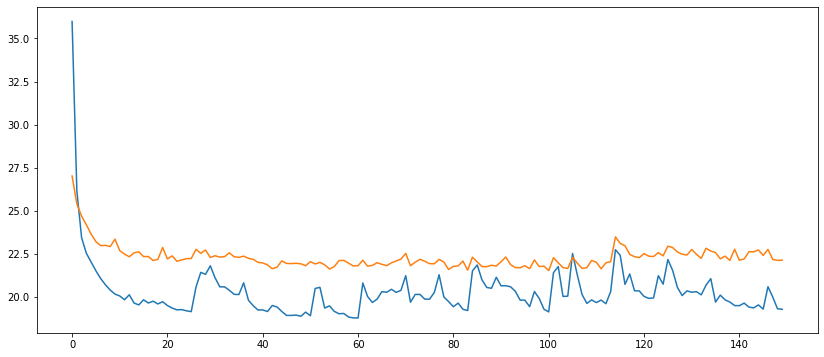

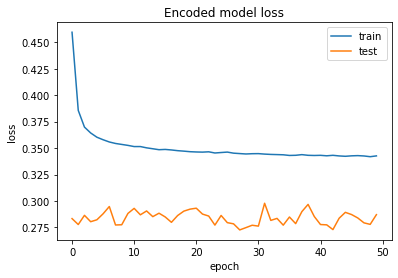

Overall accuracy of Convolutional Neural Network model: 0.8421403742846107


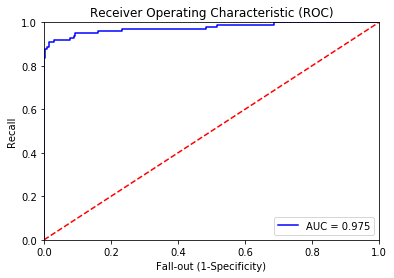

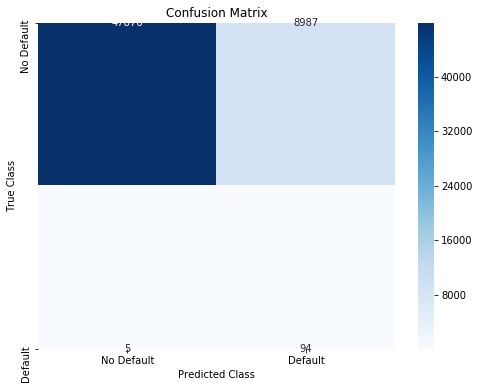

AUC(ROC): 0.8957242083000484
Precision: 0.010351282898359212
Recall: 0.9494949494949495
F1 score: 0.02047930283224401
False positives: 8987
True positives: 94
False negatives: 5
True negatives: 47876
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454920, 30)
After OverSampling, the shape of train_y: (454920,) 

After OverSampling, counts of label '1': 227468
After OverSampling, counts of label '0': 227452
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

454920/454920 [==============================] - 25s 55us/step - loss: 12.0671 - rec_loss: 19.2134 - kl_loss: 3.9825 - val_loss: 13.2214 - val_rec_loss: 23.1048 - val_kl_loss: 2.8342
Epoch 17/150
454920/454920 [==============================] - 25s 56us/step - loss: 11.9630 - rec_loss: 19.0010 - kl_loss: 4.0103 - val_loss: 13.3102 - val_rec_loss: 23.2406 - val_kl_loss: 2.8720
Epoch 18/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.9213 - rec_loss: 18.9130 - kl_loss: 4.0148 - val_loss: 13.2811 - val_rec_loss: 23.2648 - val_kl_loss: 2.7968
Epoch 19/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.8578 - rec_loss: 18.8185 - kl_loss: 4.0111 - val_loss: 13.1770 - val_rec_loss: 22.9756 - val_kl_loss: 2.8951
Epoch 20/150
454920/454920 [==============================] - 25s 56us/step - loss: 11.8477 - rec_loss: 18.7881 - kl_loss: 4.0217 - val_loss: 13.0440 - val_rec_loss: 22.5879 - val_kl_loss: 3.0181
Epoch 21/150
454920/454920 [=====

Epoch 58/150
454920/454920 [==============================] - 24s 53us/step - loss: 11.4854 - rec_loss: 17.8229 - kl_loss: 4.1830 - val_loss: 12.9300 - val_rec_loss: 22.0390 - val_kl_loss: 3.2445
Epoch 59/150
454920/454920 [==============================] - 24s 52us/step - loss: 11.4942 - rec_loss: 17.8499 - kl_loss: 4.1733 - val_loss: 12.9167 - val_rec_loss: 22.0598 - val_kl_loss: 3.1923
Epoch 60/150
454920/454920 [==============================] - 24s 53us/step - loss: 11.6051 - rec_loss: 18.0740 - kl_loss: 4.1746 - val_loss: 12.7647 - val_rec_loss: 21.6324 - val_kl_loss: 3.3035
Epoch 61/150
454920/454920 [==============================] - 24s 53us/step - loss: 11.4773 - rec_loss: 17.8134 - kl_loss: 4.1752 - val_loss: 12.8022 - val_rec_loss: 21.7946 - val_kl_loss: 3.2153
Epoch 62/150
454920/454920 [==============================] - 25s 54us/step - loss: 11.5334 - rec_loss: 17.9185 - kl_loss: 4.1761 - val_loss: 12.6965 - val_rec_loss: 21.6912 - val_kl_loss: 3.0888
Epoch 63/150
454920/

Epoch 100/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.6781 - rec_loss: 18.1628 - kl_loss: 4.2034 - val_loss: 12.7003 - val_rec_loss: 21.5968 - val_kl_loss: 3.1844
Epoch 101/150
454920/454920 [==============================] - 26s 56us/step - loss: 11.7048 - rec_loss: 18.1869 - kl_loss: 4.2190 - val_loss: 12.7554 - val_rec_loss: 21.7375 - val_kl_loss: 3.1539
Epoch 102/150
454920/454920 [==============================] - 25s 56us/step - loss: 11.5586 - rec_loss: 17.9005 - kl_loss: 4.2282 - val_loss: 12.7575 - val_rec_loss: 21.7392 - val_kl_loss: 3.1588
Epoch 103/150
454920/454920 [==============================] - 25s 56us/step - loss: 11.4452 - rec_loss: 17.7034 - kl_loss: 4.2097 - val_loss: 12.8176 - val_rec_loss: 21.8663 - val_kl_loss: 3.1679
Epoch 104/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.4425 - rec_loss: 17.7404 - kl_loss: 4.1895 - val_loss: 12.7018 - val_rec_loss: 21.6712 - val_kl_loss: 3.1343
Epoch 105/150
4

454920/454920 [==============================] - 25s 55us/step - loss: 11.6531 - rec_loss: 18.1407 - kl_loss: 4.1880 - val_loss: 12.6925 - val_rec_loss: 21.6591 - val_kl_loss: 3.0866
Epoch 142/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.6462 - rec_loss: 18.1028 - kl_loss: 4.2141 - val_loss: 12.4248 - val_rec_loss: 21.1136 - val_kl_loss: 3.1192
Epoch 143/150
454920/454920 [==============================] - 25s 56us/step - loss: 11.6394 - rec_loss: 18.0917 - kl_loss: 4.2101 - val_loss: 12.4413 - val_rec_loss: 21.1062 - val_kl_loss: 3.1497
Epoch 144/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.6908 - rec_loss: 18.1947 - kl_loss: 4.2051 - val_loss: 12.5655 - val_rec_loss: 21.3950 - val_kl_loss: 3.1202
Epoch 145/150
454920/454920 [==============================] - 25s 55us/step - loss: 11.6452 - rec_loss: 18.1186 - kl_loss: 4.2009 - val_loss: 12.6555 - val_rec_loss: 21.5841 - val_kl_loss: 3.1056
Epoch 146/150
454920/454920 [

Epoch 42/50
454920/454920 [==============================] - 85s 188us/step - loss: 0.3290 - accuracy: 0.8580 - val_loss: 0.2880 - val_accuracy: 0.8778
Epoch 43/50
454920/454920 [==============================] - 87s 191us/step - loss: 0.3290 - accuracy: 0.8584 - val_loss: 0.2982 - val_accuracy: 0.8736
Epoch 44/50
454920/454920 [==============================] - 89s 197us/step - loss: 0.3288 - accuracy: 0.8581 - val_loss: 0.2827 - val_accuracy: 0.8786
Epoch 45/50
454920/454920 [==============================] - 89s 197us/step - loss: 0.3289 - accuracy: 0.8583 - val_loss: 0.2893 - val_accuracy: 0.8779
Epoch 46/50
454920/454920 [==============================] - 90s 197us/step - loss: 0.3287 - accuracy: 0.8587 - val_loss: 0.2842 - val_accuracy: 0.8760
Epoch 47/50
454920/454920 [==============================] - 90s 197us/step - loss: 0.3284 - accuracy: 0.8587 - val_loss: 0.2885 - val_accuracy: 0.8728
Epoch 48/50
454920/454920 [==============================] - 90s 197us/step - loss: 0.32

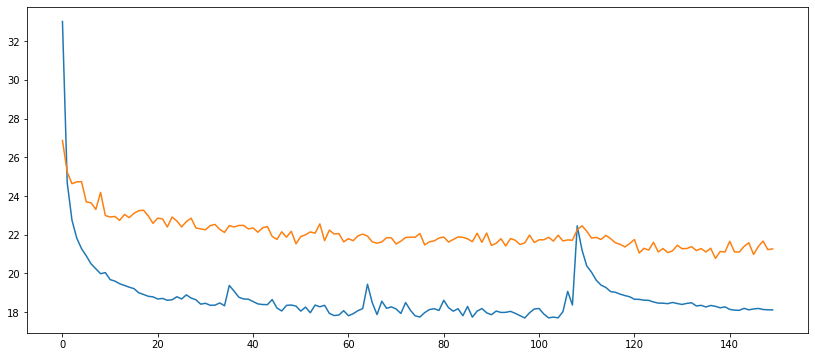

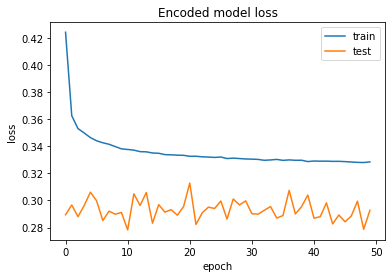

Overall accuracy of Convolutional Neural Network model: 0.8768455609978757


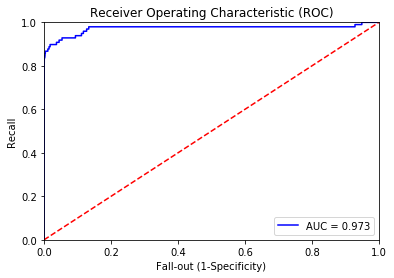

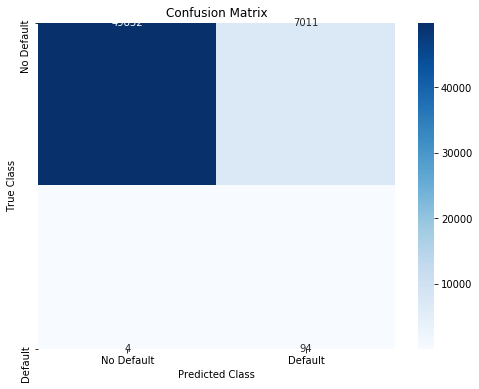

AUC(ROC): 0.917943664812706
Precision: 0.013230119634060521
Recall: 0.9591836734693877
F1 score: 0.02610023601277246
False positives: 7011
True positives: 94
False negatives: 4
True negatives: 49852
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454891, 30)
After OverSampling, the shape of train_y: (454891,) 

After OverSampling, counts of label '1': 227439
After OverSampling, counts of label '0': 227452
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

454891/454891 [==============================] - 25s 55us/step - loss: 12.3131 - rec_loss: 19.5995 - kl_loss: 4.0116 - val_loss: 13.3806 - val_rec_loss: 23.5223 - val_kl_loss: 2.7258
Epoch 17/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.2464 - rec_loss: 19.4806 - kl_loss: 4.0121 - val_loss: 13.2326 - val_rec_loss: 23.2919 - val_kl_loss: 2.6946
Epoch 18/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.2259 - rec_loss: 19.4745 - kl_loss: 4.0118 - val_loss: 13.2373 - val_rec_loss: 23.2525 - val_kl_loss: 2.7398
Epoch 19/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.1438 - rec_loss: 19.3111 - kl_loss: 4.0242 - val_loss: 13.2544 - val_rec_loss: 23.2290 - val_kl_loss: 2.8007
Epoch 20/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.1757 - rec_loss: 19.3764 - kl_loss: 4.0301 - val_loss: 13.1651 - val_rec_loss: 23.0575 - val_kl_loss: 2.7879
Epoch 21/150
454891/454891 [=====

Epoch 58/150
454891/454891 [==============================] - 25s 54us/step - loss: 11.7134 - rec_loss: 18.4213 - kl_loss: 4.0770 - val_loss: 12.8960 - val_rec_loss: 22.5409 - val_kl_loss: 2.7817
Epoch 59/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.7232 - rec_loss: 18.4377 - kl_loss: 4.0811 - val_loss: 12.9594 - val_rec_loss: 22.7935 - val_kl_loss: 2.6512
Epoch 60/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.6868 - rec_loss: 18.3690 - kl_loss: 4.0858 - val_loss: 12.9475 - val_rec_loss: 22.6802 - val_kl_loss: 2.7330
Epoch 61/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.7264 - rec_loss: 18.4490 - kl_loss: 4.0798 - val_loss: 12.9947 - val_rec_loss: 22.7486 - val_kl_loss: 2.7397
Epoch 62/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.6907 - rec_loss: 18.3772 - kl_loss: 4.0837 - val_loss: 12.9942 - val_rec_loss: 22.7684 - val_kl_loss: 2.7454
Epoch 63/150
454891/

Epoch 100/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.8477 - rec_loss: 18.6036 - kl_loss: 4.0936 - val_loss: 13.0544 - val_rec_loss: 22.8260 - val_kl_loss: 2.7309
Epoch 101/150
454891/454891 [==============================] - 25s 54us/step - loss: 12.3060 - rec_loss: 19.4696 - kl_loss: 4.1197 - val_loss: 13.2708 - val_rec_loss: 23.2224 - val_kl_loss: 2.7464
Epoch 102/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.0752 - rec_loss: 18.9800 - kl_loss: 4.1328 - val_loss: 13.2580 - val_rec_loss: 23.2312 - val_kl_loss: 2.6921
Epoch 103/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.0525 - rec_loss: 18.9333 - kl_loss: 4.1264 - val_loss: 13.0755 - val_rec_loss: 22.8141 - val_kl_loss: 2.7254
Epoch 104/150
454891/454891 [==============================] - 25s 55us/step - loss: 12.2564 - rec_loss: 19.3169 - kl_loss: 4.1382 - val_loss: 13.4029 - val_rec_loss: 23.5783 - val_kl_loss: 2.6330
Epoch 105/150
4

454891/454891 [==============================] - 25s 56us/step - loss: 12.6901 - rec_loss: 20.1392 - kl_loss: 4.1705 - val_loss: 13.1580 - val_rec_loss: 22.9591 - val_kl_loss: 2.7040
Epoch 142/150
454891/454891 [==============================] - 25s 56us/step - loss: 12.3311 - rec_loss: 19.4275 - kl_loss: 4.1257 - val_loss: 13.3012 - val_rec_loss: 23.1968 - val_kl_loss: 2.7462
Epoch 143/150
454891/454891 [==============================] - 25s 54us/step - loss: 12.2095 - rec_loss: 19.1917 - kl_loss: 4.1371 - val_loss: 13.3337 - val_rec_loss: 23.3941 - val_kl_loss: 2.6404
Epoch 144/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.8052 - rec_loss: 18.4623 - kl_loss: 4.1342 - val_loss: 13.0974 - val_rec_loss: 22.9189 - val_kl_loss: 2.7049
Epoch 145/150
454891/454891 [==============================] - 25s 55us/step - loss: 11.8530 - rec_loss: 18.5855 - kl_loss: 4.1397 - val_loss: 13.0676 - val_rec_loss: 22.7666 - val_kl_loss: 2.8134
Epoch 146/150
454891/454891 [

454891/454891 [==============================] - 100s 220us/step - loss: 0.3122 - accuracy: 0.8731 - val_loss: 0.2617 - val_accuracy: 0.8700
Epoch 42/50
454891/454891 [==============================] - 101s 221us/step - loss: 0.3122 - accuracy: 0.8734 - val_loss: 0.2625 - val_accuracy: 0.8651
Epoch 43/50
454891/454891 [==============================] - 101s 222us/step - loss: 0.3128 - accuracy: 0.8731 - val_loss: 0.2636 - val_accuracy: 0.8694
Epoch 44/50
454891/454891 [==============================] - 101s 222us/step - loss: 0.3127 - accuracy: 0.8730 - val_loss: 0.2648 - val_accuracy: 0.8691
Epoch 45/50
454891/454891 [==============================] - 100s 221us/step - loss: 0.3122 - accuracy: 0.8731 - val_loss: 0.2704 - val_accuracy: 0.8649
Epoch 46/50
454891/454891 [==============================] - 100s 220us/step - loss: 0.3123 - accuracy: 0.8735 - val_loss: 0.2710 - val_accuracy: 0.8632
Epoch 47/50
454891/454891 [==============================] - 101s 221us/step - loss: 0.3122 - 

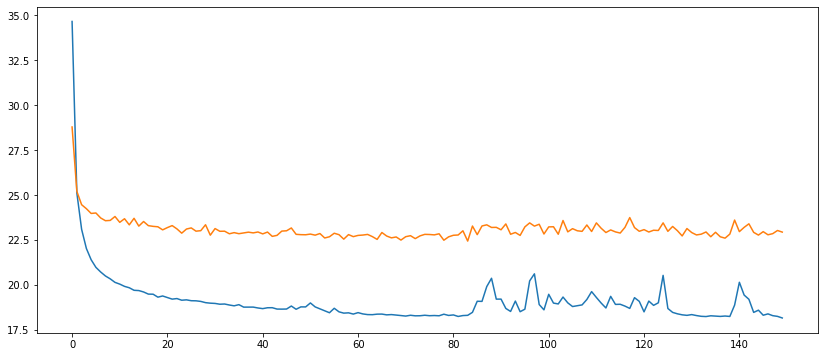

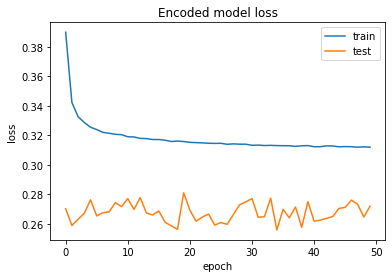

Overall accuracy of Convolutional Neural Network model: 0.867137164024508


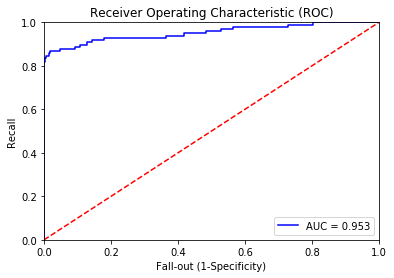

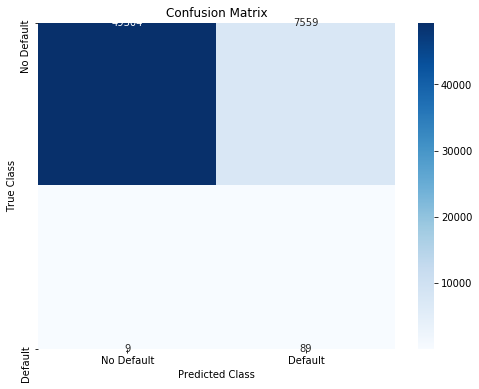

AUC(ROC): 0.8876148616420347
Precision: 0.011637029288702928
Recall: 0.9081632653061225
F1 score: 0.022979602375419572
False positives: 7559
True positives: 89
False negatives: 9
True negatives: 49304
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454896, 30)
After OverSampling, the shape of train_y: (454896,) 

After OverSampling, counts of label '1': 227444
After OverSampling, counts of label '0': 227452
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

454896/454896 [==============================] - 27s 59us/step - loss: 12.0353 - rec_loss: 19.0939 - kl_loss: 4.0090 - val_loss: 13.2582 - val_rec_loss: 23.1874 - val_kl_loss: 2.7956
Epoch 17/150
454896/454896 [==============================] - 26s 58us/step - loss: 12.2079 - rec_loss: 19.4591 - kl_loss: 3.9911 - val_loss: 13.2512 - val_rec_loss: 23.1976 - val_kl_loss: 2.7755
Epoch 18/150
454896/454896 [==============================] - 27s 59us/step - loss: 12.1143 - rec_loss: 19.2824 - kl_loss: 3.9885 - val_loss: 13.1655 - val_rec_loss: 22.9390 - val_kl_loss: 2.8410
Epoch 19/150
454896/454896 [==============================] - 27s 59us/step - loss: 12.0685 - rec_loss: 19.1710 - kl_loss: 4.0017 - val_loss: 13.1866 - val_rec_loss: 22.9822 - val_kl_loss: 2.8654
Epoch 20/150
454896/454896 [==============================] - 27s 58us/step - loss: 12.0372 - rec_loss: 19.1108 - kl_loss: 3.9974 - val_loss: 13.2615 - val_rec_loss: 23.2241 - val_kl_loss: 2.7587
Epoch 21/150
454896/454896 [=====

Epoch 58/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.3213 - rec_loss: 17.6670 - kl_loss: 4.1743 - val_loss: 12.7532 - val_rec_loss: 22.0149 - val_kl_loss: 3.0193
Epoch 59/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.3260 - rec_loss: 17.6779 - kl_loss: 4.1708 - val_loss: 12.6835 - val_rec_loss: 21.9873 - val_kl_loss: 2.9219
Epoch 60/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.2925 - rec_loss: 17.6139 - kl_loss: 4.1712 - val_loss: 12.8162 - val_rec_loss: 22.1917 - val_kl_loss: 2.9877
Epoch 61/150
454896/454896 [==============================] - 28s 61us/step - loss: 11.3589 - rec_loss: 17.7396 - kl_loss: 4.1694 - val_loss: 12.8755 - val_rec_loss: 22.3293 - val_kl_loss: 2.9632
Epoch 62/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.2961 - rec_loss: 17.6285 - kl_loss: 4.1636 - val_loss: 12.6809 - val_rec_loss: 22.0126 - val_kl_loss: 2.8973
Epoch 63/150
454896/

Epoch 100/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.4884 - rec_loss: 17.8928 - kl_loss: 4.2476 - val_loss: 12.8195 - val_rec_loss: 22.0147 - val_kl_loss: 3.0872
Epoch 101/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.2848 - rec_loss: 17.4796 - kl_loss: 4.2511 - val_loss: 12.8964 - val_rec_loss: 22.2277 - val_kl_loss: 3.0322
Epoch 102/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.3442 - rec_loss: 17.6137 - kl_loss: 4.2564 - val_loss: 12.9745 - val_rec_loss: 22.3934 - val_kl_loss: 3.0210
Epoch 103/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.2929 - rec_loss: 17.4922 - kl_loss: 4.2553 - val_loss: 12.7248 - val_rec_loss: 21.8679 - val_kl_loss: 3.0461
Epoch 104/150
454896/454896 [==============================] - 27s 59us/step - loss: 11.3485 - rec_loss: 17.6097 - kl_loss: 4.2517 - val_loss: 13.0374 - val_rec_loss: 22.4085 - val_kl_loss: 3.1104
Epoch 105/150
4

454896/454896 [==============================] - 27s 59us/step - loss: 11.9202 - rec_loss: 18.6570 - kl_loss: 4.1864 - val_loss: 12.7526 - val_rec_loss: 21.8275 - val_kl_loss: 3.0579
Epoch 142/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.5533 - rec_loss: 18.0288 - kl_loss: 4.1897 - val_loss: 12.6080 - val_rec_loss: 21.5633 - val_kl_loss: 3.1100
Epoch 143/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.4956 - rec_loss: 18.0007 - kl_loss: 4.1554 - val_loss: 12.7404 - val_rec_loss: 22.0124 - val_kl_loss: 2.9506
Epoch 144/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.5417 - rec_loss: 18.0902 - kl_loss: 4.1844 - val_loss: 12.9623 - val_rec_loss: 22.4032 - val_kl_loss: 3.0114
Epoch 145/150
454896/454896 [==============================] - 27s 60us/step - loss: 11.8246 - rec_loss: 18.5324 - kl_loss: 4.2438 - val_loss: 12.7233 - val_rec_loss: 21.8323 - val_kl_loss: 3.0467
Epoch 146/150
454896/454896 [

454896/454896 [==============================] - 108s 238us/step - loss: 0.3465 - accuracy: 0.8545 - val_loss: 0.3053 - val_accuracy: 0.8760
Epoch 42/50
454896/454896 [==============================] - 102s 224us/step - loss: 0.3462 - accuracy: 0.8547 - val_loss: 0.3158 - val_accuracy: 0.8745
Epoch 43/50
454896/454896 [==============================] - 102s 225us/step - loss: 0.3467 - accuracy: 0.8542 - val_loss: 0.3237 - val_accuracy: 0.8699
Epoch 44/50
454896/454896 [==============================] - 103s 226us/step - loss: 0.3461 - accuracy: 0.8549 - val_loss: 0.3061 - val_accuracy: 0.8756
Epoch 45/50
454896/454896 [==============================] - 104s 228us/step - loss: 0.3462 - accuracy: 0.8549 - val_loss: 0.2913 - val_accuracy: 0.8743
Epoch 46/50
454896/454896 [==============================] - 103s 227us/step - loss: 0.3464 - accuracy: 0.8548 - val_loss: 0.2963 - val_accuracy: 0.8771
Epoch 47/50
454896/454896 [==============================] - 104s 228us/step - loss: 0.3461 - 

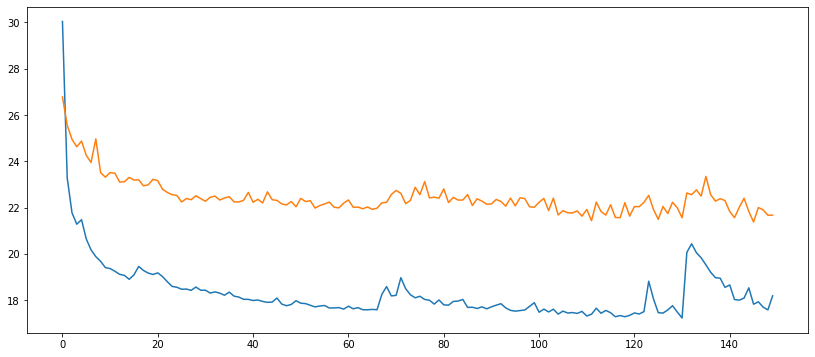

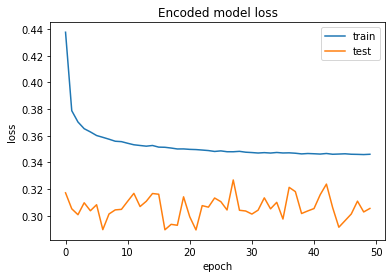

Overall accuracy of Convolutional Neural Network model: 0.8748793033830164


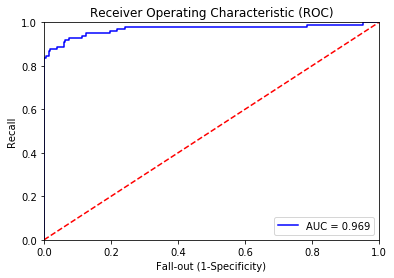

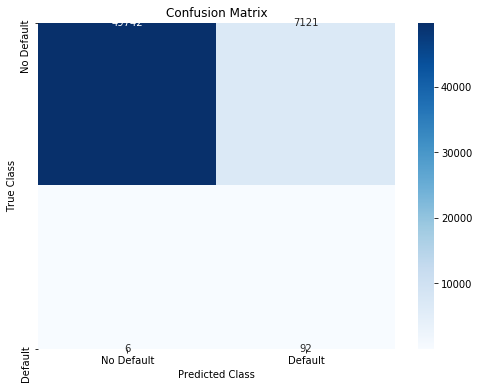

AUC(ROC): 0.9067723461366328
Precision: 0.012754748370996811
Recall: 0.9387755102040817
F1 score: 0.02516755573792915
False positives: 7121
True positives: 92
False negatives: 6
True negatives: 49742


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 49209.2
Average fp = 7653.8
Average fn = 6.0
Average tp = 92.4
Average Precision = 1.19%
Average Recall = 93.90%
Average F1 score = 2.36%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 246046
Total fp: 38269
 Total fn:30
 Total tp:462
Total Precision = 0.011928429423459244
Total Recall = 0.9390243902439024
Total F1_score = 0.02355760650638656
